In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import os

# Random Noise

In [51]:
def plot_data(df_list, title, sample_entry, gauss):

    for df in df_list:
        df.columns = df.columns.astype(str)

    spectra = [col for col in df_list[0].columns if 'layer' not in col]

    if gauss:
        noise = ['Exact', 'SNR = 35', 'SNR = 45', 'SNR = 50', 'SNR = 55']
    else:
        noise = ['Noise = 0.1%', 'Noise = 0.5%', 'Noise = 1%', 'Noise = 2.5%', 'Exact']

    plt.figure(figsize=(10,6))
    for index, df in enumerate(df_list):
        plt.plot(df.iloc[sample_entry][spectra], label=f'{noise[index]}')

    plt.title(title)
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

In [52]:
def read_files(folder_path):
    file_list = os.listdir(folder_path)
    
    test_data = []
    for filename in file_list:
        file_path = os.path.join(folder_path, filename)

        test_data.append(pd.read_excel(file_path))

    return test_data

### Fused Silica

#### Training data

In [53]:
fs_train_data = pd.read_excel('fused_silica_train.xlsx')

In [54]:
fs_train_data.describe()

,layer 1,layer 2,layer 3,layer 4,layer 5,layer 6,layer 7,layer 8,layer 9,layer 10,...,7.55e-06,7.6e-06,7.65e-06,7.7e-06,7.75e-06,7.8e-06,7.85e-06,7.9e-06,7.95e-06,8e-06
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,...,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03
mean,322.042719,322.703456,322.961408,323.135481,323.267456,323.067818,322.992713,322.979496,322.908237,322.937285,...,2.739532e-12,2.781844e-12,2.819774e-12,2.850398e-12,2.871830e-12,2.877078e-12,2.853130e-12,2.787261e-12,2.687913e-12,2.596406e-12
std,28.636605,17.166056,13.257438,12.890582,12.768902,12.889848,13.047267,13.010630,13.237164,16.941897,...,1.381141e-12,1.397440e-12,1.409713e-12,1.417270e-12,1.419857e-12,1.414407e-12,1.394745e-12,1.354928e-12,1.299374e-12,1.248207e-12
min,273.013254,278.903005,284.116489,277.878137,282.350589,281.951229,283.232748,277.894387,284.931117,277.735163,...,8.567664e-13,8.757218e-13,8.941626e-13,9.110116e-13,9.252313e-13,9.342955e-13,9.337853e-13,9.192807e-13,8.932722e-13,8.693476e-13
25%,297.641079,310.344187,313.879478,314.691880,314.331351,314.218873,314.212557,313.920301,313.590487,310.666483,...,1.482575e-12,1.511402e-12,1.538023e-12,1.561560e-12,1.580505e-12,1.590576e-12,1.584383e-12,1.554616e-12,1.505703e-12,1.460654e-12
50%,321.519205,322.541722,322.916247,323.097356,322.802506,323.213453,322.915950,322.886269,323.077473,323.227448,...,2.459033e-12,2.499868e-12,2.538607e-12,2.570180e-12,2.593243e-12,2.601622e-12,2.583509e-12,2.527262e-12,2.440400e-12,2.360373e-12
75%,346.679700,335.016963,332.180983,331.965652,332.478725,332.093941,332.325726,331.850232,332.395380,335.316317,...,3.856006e-12,3.911604e-12,3.960127e-12,3.997845e-12,4.022450e-12,4.024354e-12,3.985496e-12,3.888292e-12,3.744733e-12,3.612491e-12
max,372.979256,372.184932,366.015647,365.974448,358.914869,361.753094,362.553425,358.313206,362.664285,368.843508,...,5.547230e-12,5.618997e-12,5.677792e-12,5.719547e-12,5.741960e-12,5.731986e-12,5.664261e-12,5.514222e-12,5.299357e-12,5.101503e-12


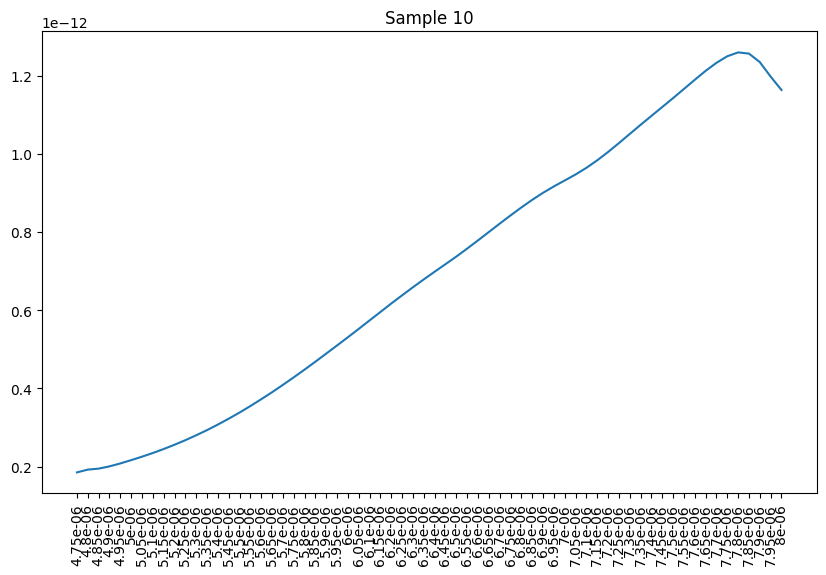

In [55]:
fs_train_data.columns = fs_train_data.columns.astype(str)
spectra = [col for col in fs_train_data.columns if 'layer' not in col]

plt.figure(figsize=(10,6))

plt.plot(fs_train_data.iloc[10][spectra])

plt.title('Sample 10')
plt.xticks(rotation=90)
plt.show()

#### Test data

In [56]:
fs_test_data = read_files('fused_silica_random_noise')

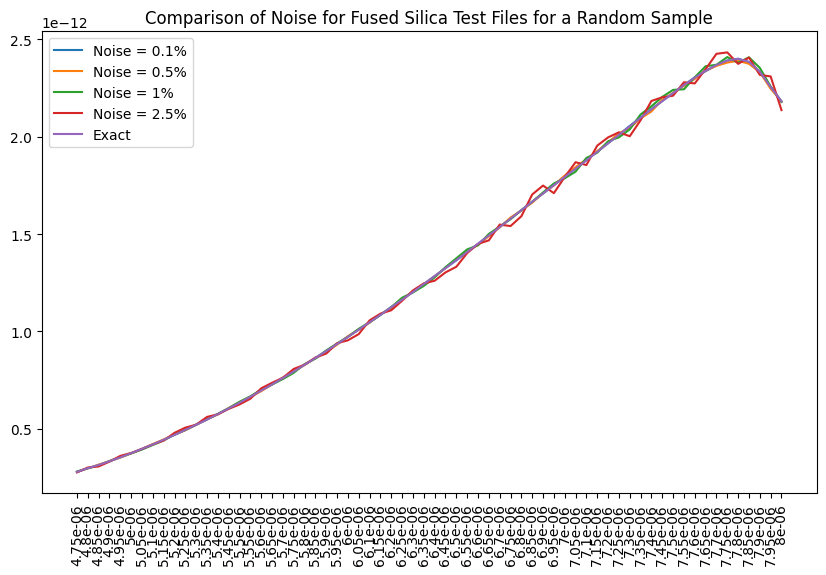

In [57]:
plot_data(fs_test_data, 'Comparison of Noise for Fused Silica Test Files for a Random Sample', 10, False)

### GaN

In [58]:
GaN_data = read_files('GaN_random_noise')

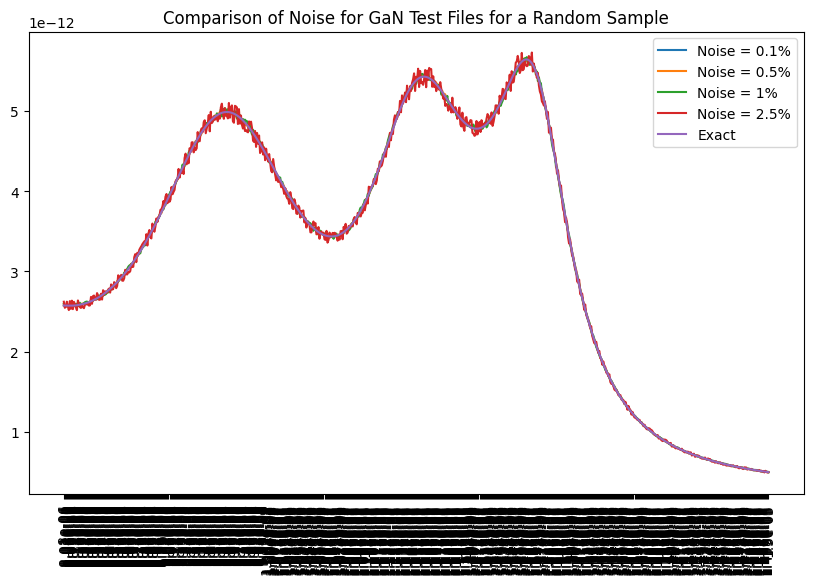

In [59]:
plot_data(GaN_data, 'Comparison of Noise for GaN Test Files for a Random Sample', 10, False)

### InSb

In [60]:
InSb_data = read_files('InSb_random_noise')

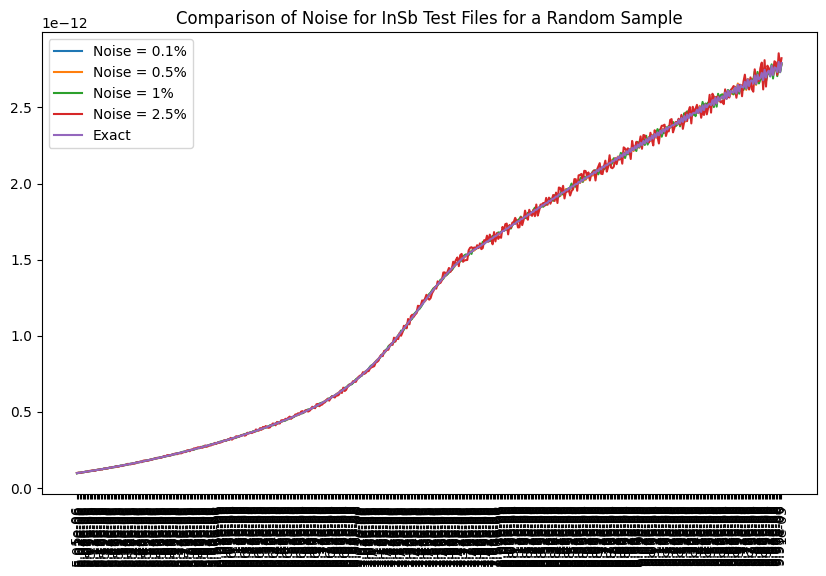

In [61]:
plot_data(InSb_data, 'Comparison of Noise for InSb Test Files for a Random Sample', 10, False)

# Gaussian Noise

### Fused Silica

In [62]:
fs_test_data = read_files('fused_silica_gauss')

In [74]:
len([col for col in fs_test_data[0].columns if 'layer' not in col])

66

In [75]:
len([col for col in fs_test_data[0].columns if 'layer' in col])

11

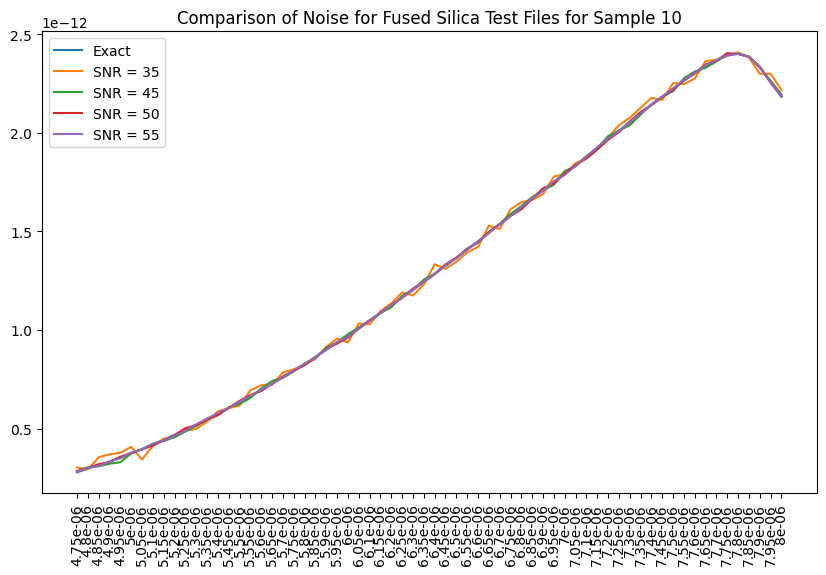

In [63]:
plot_data(fs_test_data, 'Comparison of Noise for Fused Silica Test Files for Sample 10', 10, True)

### GaN

In [64]:
GaN_data = read_files('GaN_gauss')

In [72]:
len([col for col in GaN_data[0].columns if 'layer' not in col])

701

In [73]:
len([col for col in GaN_data[0].columns if 'layer' in col])

20

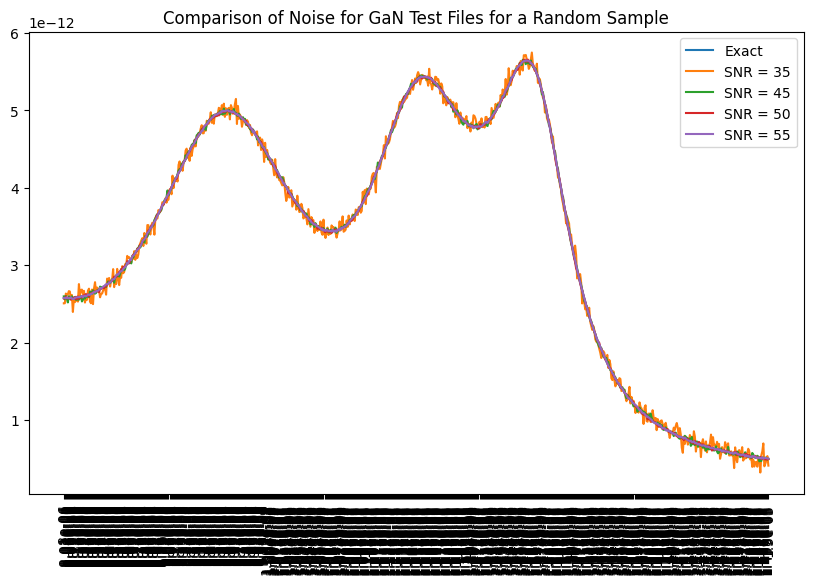

In [65]:
plot_data(GaN_data, 'Comparison of Noise for GaN Test Files for a Random Sample', 10, True)

### InSb

In [66]:
InSb_data = read_files('InSb_gauss')

In [70]:
len([col for col in InSb_data[0].columns if 'layer' not in col])

501

In [71]:
len([col for col in InSb_data[0].columns if 'layer' in col])

20

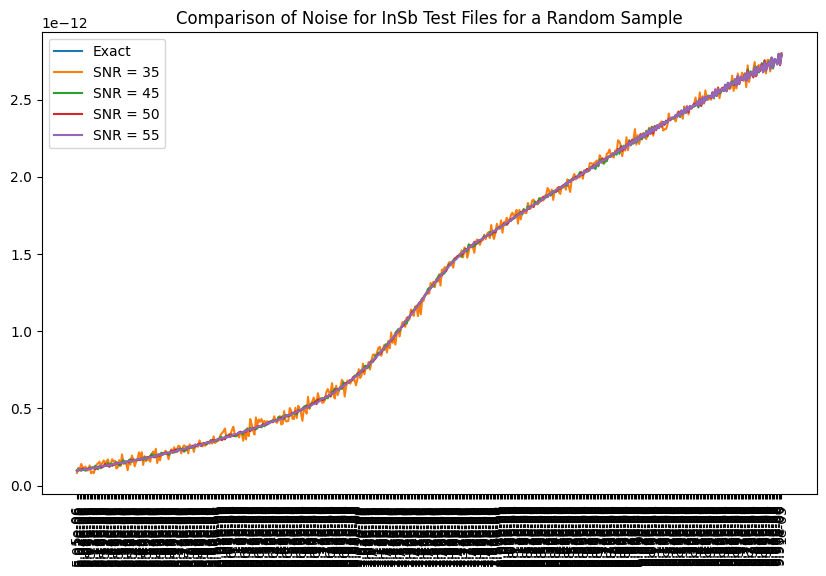

In [67]:
plot_data(InSb_data, 'Comparison of Noise for InSb Test Files for a Random Sample', 10, True)